In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/src")
import helpers as hlp

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Set plot sizes
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26
BIGGEST_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

# Load & Merge CSV Data

In [4]:
aws_data_dir = '../data/web_scraped/aws_final/'

# Use helper function to load and merge CSVs from folders in above dir
df_all_hotels = hlp.merge_csv_mult_dir(aws_data_dir)

Folders: ['Tokyo-Kanto-pg1', 'Honolulu-Hawaii.pg1', 'Honolulu-Hawaii.pg4', 'Honolulu-Hawaii.pg3', 'Honolulu-Hawaii.pg2', 'New_York_City-New_York-pg1']


In [5]:
df_all_hotels.shape

(212155, 10)

In [6]:
df_all_hotels.head()

,review_id,url,hotel_name,review_date,review_body,user_location,helpful_vote,rating,csv,folder
0,749389994,https://www.tripadvisor.com/Hotel_Review-g1412...,Aman Tokyo,"March 5, 2020",Consistent service with my past Aman hotel exp...,"Sunnyvale, California",4,5.0,Aman_Tokyo-Otemachi_Chiyoda_Tokyo_Tokyo_Prefec...,Tokyo-Kanto-pg1
1,749264661,https://www.tripadvisor.com/Hotel_Review-g1412...,Aman Tokyo,"March 5, 2020",Stayed for 3 days and everything at Aman is pe...,"Vancouver, Canada",6,5.0,Aman_Tokyo-Otemachi_Chiyoda_Tokyo_Tokyo_Prefec...,Tokyo-Kanto-pg1
2,746956250,https://www.tripadvisor.com/Hotel_Review-g1412...,Aman Tokyo,"February 23, 2020",Although I live in Tokyo but I decided to take...,"Tokyo, Japan",53,4.0,Aman_Tokyo-Otemachi_Chiyoda_Tokyo_Tokyo_Prefec...,Tokyo-Kanto-pg1
3,745398599,https://www.tripadvisor.com/Hotel_Review-g1412...,Aman Tokyo,"February 16, 2020",An outstanding stay in a beautiful Aman in dow...,"Singapore, Singapore",5,5.0,Aman_Tokyo-Otemachi_Chiyoda_Tokyo_Tokyo_Prefec...,Tokyo-Kanto-pg1
4,743365715,https://www.tripadvisor.com/Hotel_Review-g1412...,Aman Tokyo,"February 6, 2020",Stayed here for 2 nights (second time after 3 ...,"Singapore, Singapore",38,5.0,Aman_Tokyo-Otemachi_Chiyoda_Tokyo_Tokyo_Prefec...,Tokyo-Kanto-pg1


In [7]:
df_all_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212155 entries, 0 to 212154
Data columns (total 10 columns):
review_id        212155 non-null int64
url              212155 non-null object
hotel_name       212155 non-null object
review_date      212155 non-null object
review_body      212155 non-null object
user_location    184157 non-null object
helpful_vote     212155 non-null int64
rating           212155 non-null float64
csv              212155 non-null object
folder           212155 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 16.2+ MB


In [8]:
# Check for duplicate rows
dup_rows = df_all_hotels[df_all_hotels.duplicated()].count()
print('Number of duplicate rows:\n\n{}'.format(dup_rows))

Number of duplicate rows:

review_id        0
url              0
hotel_name       0
review_date      0
review_body      0
user_location    0
helpful_vote     0
rating           0
csv              0
folder           0
dtype: int64


In [9]:
# Get count, pct, and type of missing data (per column)
hlp.get_nulls(df_all_hotels)

,Total,Percent,Type
user_location,27998,0.13197,object
folder,0,0.00000,object
csv,0,0.00000,object
rating,0,0.00000,float64
helpful_vote,0,0.00000,int64
review_body,0,0.00000,object
review_date,0,0.00000,object
hotel_name,0,0.00000,object
url,0,0.00000,object
review_id,0,0.00000,int64


# Clean & Prep Data

In [10]:
df_all_hotels_cleaned = df_all_hotels.copy()

# Use helper function to do clean & prep
df_all_hotels_cleaned = hlp.clean_and_prep(df_all_hotels_cleaned)

df_all_hotels_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212155 entries, 0 to 212154
Data columns (total 14 columns):
review_id        212155 non-null int64
url              212155 non-null object
hotel_name       212155 non-null object
review_date      212155 non-null object
review_body      212155 non-null object
user_location    212155 non-null object
helpful_vote     212155 non-null int64
rating           212155 non-null float64
csv              212155 non-null object
folder           212155 non-null object
City             212155 non-null object
polarity         212155 non-null float64
sentiment_int    212155 non-null int64
sentiment        212155 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 24.3+ MB


# EDA

In [11]:
df_all_hotels_cleaned.sample(15)

,review_id,url,hotel_name,review_date,review_body,user_location,helpful_vote,rating,csv,folder,City,polarity,sentiment_int,sentiment
139284,128440257,https://www.tripadvisor.com/Hotel_Review-g6098...,Lotus Honolulu at Diamond Head,"April 23, 2012",I love this hotel! It's tucked away in a quiet...,"Haiku, Hawaii",2,5.0,Lotus_Honolulu_at_Diamond_Head-Honolulu_Oahu_H...,Honolulu-Hawaii.pg2,Honolulu,1.0,2,positive
138304,596225223,https://www.tripadvisor.com/Hotel_Review-g6098...,Lotus Honolulu at Diamond Head,"July 14, 2018",We decided to stay at this hotel after a horri...,n/a,7,5.0,Lotus_Honolulu_at_Diamond_Head-Honolulu_Oahu_H...,Honolulu-Hawaii.pg2,Honolulu,1.0,2,positive
180422,645801847,https://www.tripadvisor.com/Hotel_Review-g6076...,Moxy NYC Downtown,"January 14, 2019",The appeal of this hotel is outside the rooms....,"Atlanta, Georgia",6,4.0,Moxy_NYC_Downtown-New_York_City_New_York__en.csv,New_York_City-New_York-pg1,New_York_City,1.0,2,positive
164651,382657702,https://www.tripadvisor.com/Hotel_Review-g6098...,Airport Honolulu Hotel,"June 14, 2016",We stayed here on the first and last night in ...,"Brisbane, Australia",163,3.0,Airport_Honolulu_Hotel-Honolulu_Oahu_Hawaii__e...,Honolulu-Hawaii.pg2,Honolulu,0.5,1,neutral
179789,603339841,https://www.tripadvisor.com/Hotel_Review-g6076...,Four Seasons Hotel New York,"August 6, 2018",Everything about the Four Seasons is fantastic...,"Huntington, New York",0,5.0,Four_Seasons_Hotel_New_York-New_York_City_New_...,New_York_City-New_York-pg1,New_York_City,1.0,2,positive
60306,84074751,https://www.tripadvisor.com/Hotel_Review-g6098...,Hilton Waikiki Beach,"October 19, 2010",just spent a week at the hotel and i would mos...,"Beverly Hills, California",0,5.0,Hilton_Waikiki_Beach-Honolulu_Oahu_Hawaii__en.csv,Honolulu-Hawaii.pg1,Honolulu,1.0,2,positive
14330,696379259,https://www.tripadvisor.com/Hotel_Review-g1066...,The Royal Park Hotel Iconic Tokyo Shiodome,"August 6, 2019",Good location and excellent accommodations. Th...,"Castro Valley, California",18,5.0,The_Royal_Park_Hotel_Iconic_Tokyo_Shiodome-Min...,Tokyo-Kanto-pg1,Tokyo,1.0,2,positive
12654,616808332,https://www.tripadvisor.com/Hotel_Review-g1066...,Tokyo Marriott Hotel,"September 15, 2018",The location: not too far away from the city a...,"Nice, France",39,4.0,Tokyo_Marriott_Hotel-Shinagawa_Tokyo_Tokyo_Pre...,Tokyo-Kanto-pg1,Tokyo,1.0,2,positive
210904,116729261,https://www.tripadvisor.com/Hotel_Review-g6076...,New York Hilton Midtown,"August 14, 2011",This was my second stay at this hotel. The fir...,"Altanta, GA",15,3.0,New_York_Hilton_Midtown-New_York_City_New_York...,New_York_City-New_York-pg1,New_York_City,0.5,1,neutral
169350,221437649,https://www.tripadvisor.com/Hotel_Review-g6076...,Pod 51 Hotel,"August 12, 2014","Centric and near metro stations, little rooms ...","Barcelona, Spain",5,5.0,Pod_51_Hotel-New_York_City_New_York__en.csv,New_York_City-New_York-pg1,New_York_City,1.0,2,positive


In [12]:
# Print how many unique values each column has
hlp.print_unique_ct(df_all_hotels_cleaned)

Count of Unique Values per Column:

review_id: 212155
url: 42484
hotel_name: 149
review_date: 6248
review_body: 212124
user_location: 27830
helpful_vote: 799
rating: 5
csv: 149
folder: 6
City: 3
polarity: 3
sentiment_int: 3
sentiment: 3


In [13]:
df_all_hotels_cleaned.describe()

,review_id,helpful_vote,rating,polarity,sentiment_int
count,2.121550e+05,212155.000000,212155.000000,212155.000000,212155.000000
mean,3.485569e+08,30.036360,4.104650,0.837633,1.675266
std,2.108024e+08,192.647358,1.094571,0.321905,0.643809
min,2.824200e+05,0.000000,1.000000,0.000000,0.000000
25%,1.655966e+08,2.000000,4.000000,1.000000,2.000000
50%,3.260000e+08,9.000000,4.000000,1.000000,2.000000
75%,5.286325e+08,29.000000,5.000000,1.000000,2.000000
max,7.534573e+08,34443.000000,5.000000,1.000000,2.000000


Total Number of Reviews: 212155


Text(0.5, 1.0, 'Count of Hotel Reviews per City')

Text(0.5, 0, 'City')

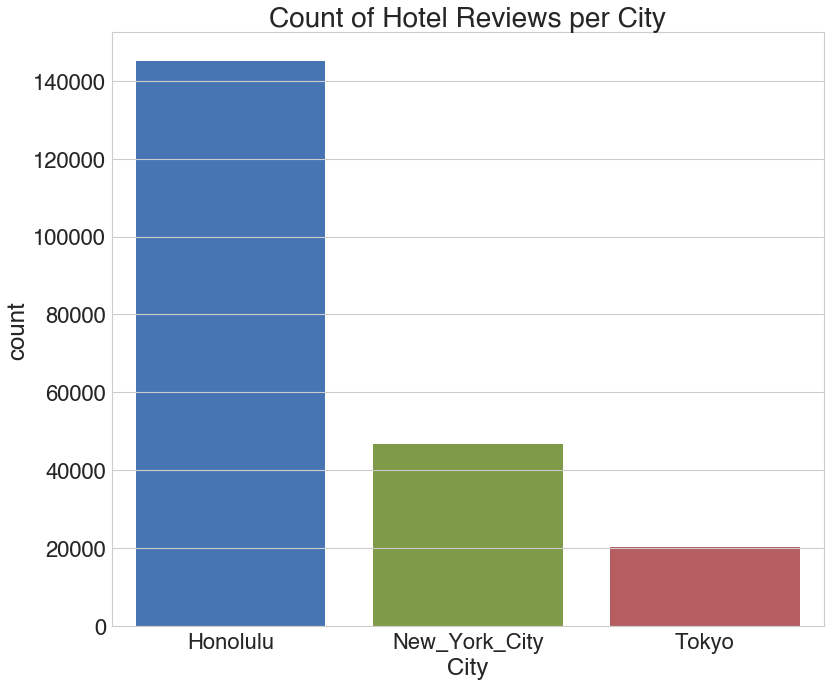

In [14]:
# Plot counts - Reviews per city
df = df_all_hotels_cleaned
print('Total Number of Reviews:', df.shape[0])

fig, ax = plt.subplots(figsize=(12,10))
plot = sns.countplot(data=df, x='City', ax=ax, order = df['City'].value_counts().index)
ax.set_title('Count of Hotel Reviews per City', size=BIGGEST_SIZE)
ax.set_xlabel('City')
fig.tight_layout()
fig.savefig('../images/countplot_reviews_byCity_full')

Text(0.5, 1.0, 'Distribution of Ratings per City')

Text(0, 0.5, 'Hotel Rating')

Text(0.5, 0, 'City')

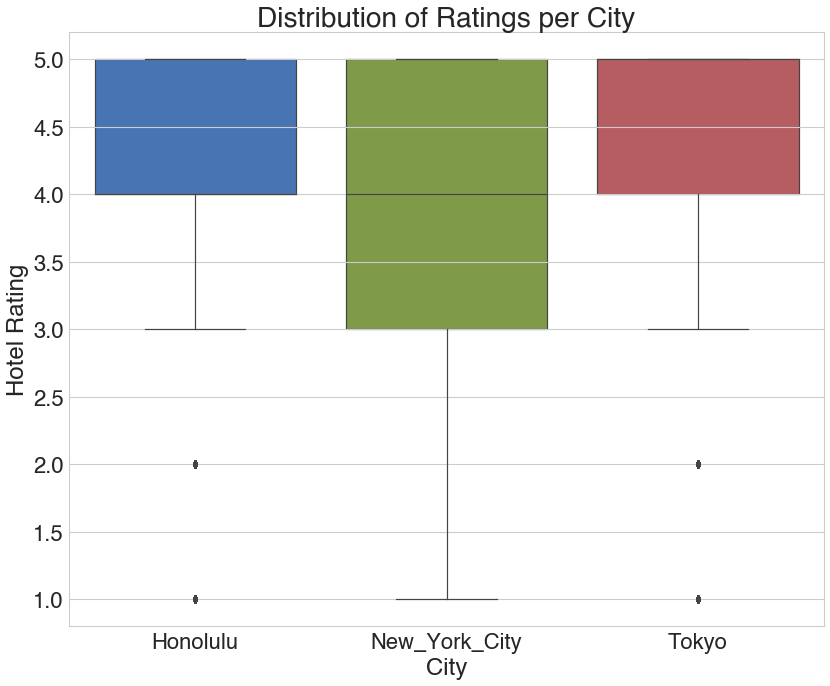

In [15]:
# Plot boxplot - Ratings per city
figsize=(12, 10)
fig, ax = plt.subplots(figsize=figsize)
plot = sns.boxplot(x='City', y='rating', data=df, ax=ax, order = df['City'].value_counts().index)
ax.set_title('Distribution of Ratings per City', size=BIGGEST_SIZE)
ax.set_ylabel('Hotel Rating')
ax.set_xlabel('City')
fig.tight_layout()
fig.savefig('../images/boxplt_ratings_byCity_full')

Total Number of Ratings:  212155


Text(0.5, 1.0, 'Counts of Hotel Ratings')

Text(0.5, 0, 'Hotel Rating')

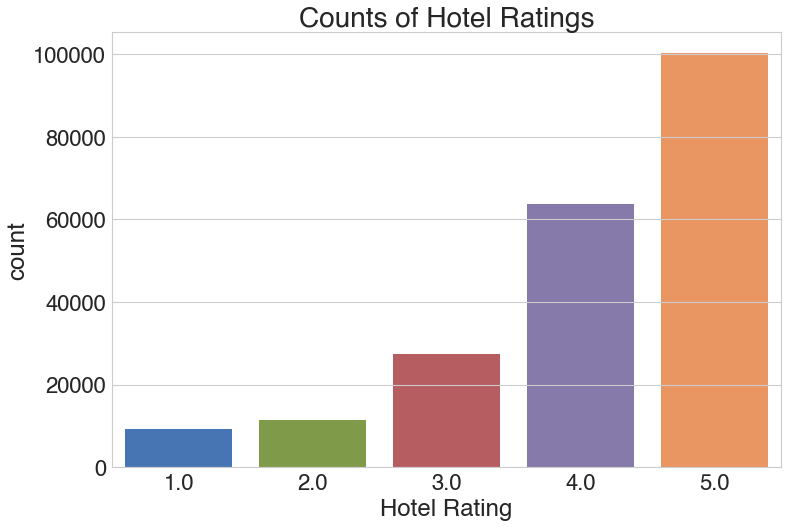

In [16]:
# Plot counts - Ratings
df = df_all_hotels_cleaned
print('Total Number of Ratings: ', df.shape[0])

fig, ax = plt.subplots(figsize=(12,8))
plot = sns.countplot(data=df, x='rating', ax=ax)
ax.set_title('Counts of Hotel Ratings', size=BIGGEST_SIZE)
ax.set_xlabel('Hotel Rating')
fig.savefig('../images/countplot_ratings_full')

Total Number of Ratings:  212155


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2a2d12d0>)

Text(0.5, 1, 'Initial Balance of Review Sentiments')

Text(73.76, 0.5, '')

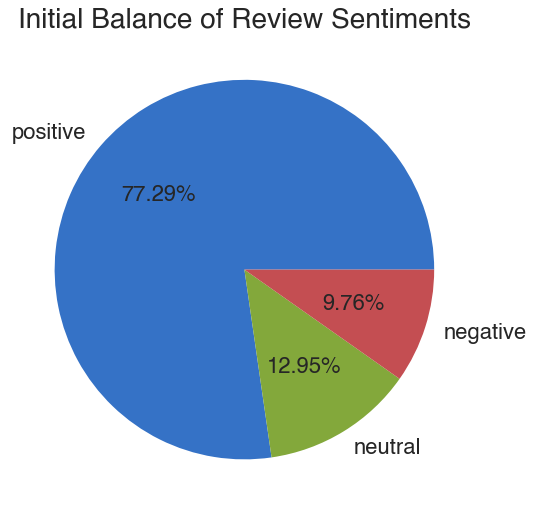

In [17]:
# Plot pie - Sentiments
df = df_all_hotels_cleaned
print('Total Number of Ratings: ', df.shape[0])

fig, ax = plt.subplots(figsize=(8,8))
hlp.plot_pie(df['sentiment'], fig, ax)
ax.set_title('Initial Balance of Review Sentiments', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('../images/pie_sentiments_full')

# Train-Test Split

In [18]:
# Specify df, target, indices, X & y
df = df_all_hotels_cleaned.copy()
target = 'sentiment'
indices = df.index

X = df['review_body']
y = df[target].to_numpy()

In [19]:
_, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size=0.2, shuffle=True, stratify=y)
indices_train.shape, indices_test.shape

((169724,), (42431,))

## Handling class imbalance by under-sampling train data

In [20]:
# Get train df with train indices
train_df = df.iloc[indices_train,:]
train_df.shape

(169724, 14)

In [21]:
# Get classes and counts
unique, counts = np.unique(y_train, return_counts=True)
unique, counts

(array(['negative', 'neutral', 'positive'], dtype=object),
 array([ 16566,  21984, 131174]))

In [22]:
# Determine majority, middle, and minority classes
majority_class = unique[np.argmax(counts)]
minority_class = unique[np.argmin(counts)]
mid_class = np.unique(y_train[(y_train!=majority_class) & (y_train!=minority_class)])[0]
print('Majority: {}, Middle: {}, Minority: {}'.format(majority_class, mid_class, minority_class))

Majority: positive, Middle: neutral, Minority: negative


In [23]:
# Get minority class indices
minority_class_indices = train_df[train_df[target]==minority_class].index
minority_class_len = minority_class_indices.shape[0]
minority_class_len

16566

In [24]:
# Get majority class indices
majority_class_indices = train_df[train_df[target]==majority_class].index
majority_class_indices

Int64Index([ 51446, 158308,   3400, 113935, 143538, 149739, 129618,  56914,
             28384, 134588,
            ...
            151021,  50482, 163890, 101688,   2338,  46209,  89208, 129860,
              2004, 187576],
           dtype='int64', length=131174)

In [25]:
# Get middle class indices
middle_class_indices = train_df[train_df[target]==mid_class].index
middle_class_indices

Int64Index([ 78053, 185392,  78277,  23530,  72933, 209923, 107863, 156454,
             67979,  71663,
            ...
             73812,  45758,  34111,  68988,   5452,  85188, 171738, 186460,
            163682,  34869],
           dtype='int64', length=21984)

In [26]:
# Randomly under-sample majority and middle class indices to get new under-sampled train df
rand_maj_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)
rand_mid_indices = np.random.choice(middle_class_indices, minority_class_len, replace=False)
undersample_indices = np.concatenate([minority_class_indices, rand_mid_indices, rand_maj_indices])

train_df_us = df.iloc[undersample_indices,:]
train_df_us.shape

(49698, 14)

Total Number of Ratings:  49698


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2a2fb8d0>)

Text(0.5, 1, 'Balance of Review Sentiments,\nAfter Under-Sampling Train')

Text(73.76, 0.5, '')

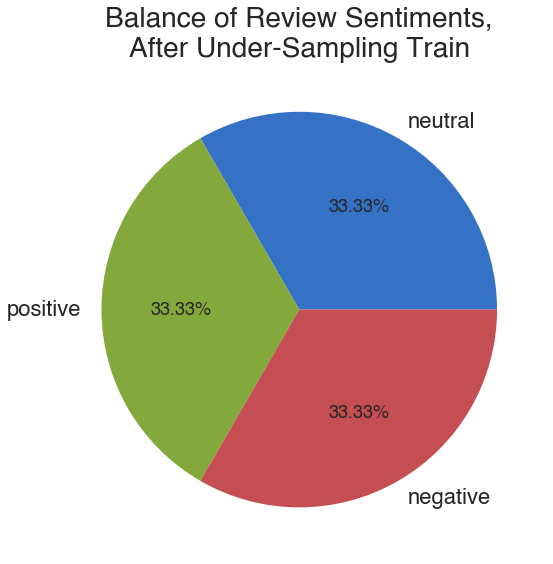

In [27]:
# Plot pie - Classes after undersampling
print('Total Number of Ratings: ', train_df_us.shape[0])

fig, ax = plt.subplots(figsize=(8,8))
hlp.plot_pie(train_df_us[target], fig, ax)
ax.set_title('Balance of Review Sentiments,\nAfter Under-Sampling Train', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('../images/pie_sentiments_train_undersample')

In [28]:
X_train_us = train_df_us['review_body']
y_train_us = train_df_us[target].to_numpy()

# NLP & Predictive Modeling

In [47]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [48]:
nb_def = MultinomialNB()

### Tf-idf, no stemmer, 200 max_features (filter English stopwords)

In [49]:
tfidf=True
stemmer=None
max_features=200

vect_tfidf_nostem_200, vocab_tfidf_nostem_200 = hlp.build_text_vectorizer(X_train_us,
                             use_tfidf=tfidf,
                             use_stemmer=stemmer,
                             max_features=max_features)

Vectorizer: TfidfVectorizer
No Stemmer
Max features: 200


In [50]:
Xtr_tfidf_nostem_200 = vect_tfidf_nostem_200(X_train_us)

In [51]:
vocab_tfidf_nostem_200

array(['across', 'air', 'also', 'although', 'always', 'amazing',
       'another', 'area', 'around', 'arrived', 'asked', 'available',
       'away', 'back', 'bad', 'balcony', 'bar', 'bathroom', 'beach',
       'beautiful', 'bed', 'beds', 'best', 'better', 'big', 'bit',
       'booked', 'breakfast', 'business', 'called', 'came', 'car',
       'charge', 'check', 'checked', 'city', 'clean', 'close', 'coffee',
       'come', 'comfortable', 'could', 'day', 'days', 'definitely',
       'desk', 'door', 'early', 'elevator', 'end', 'enough', 'etc',
       'even', 'ever', 'every', 'everything', 'excellent', 'expect',
       'expensive', 'experience', 'extra', 'family', 'fee', 'feel',
       'find', 'first', 'floor', 'food', 'found', 'free', 'friendly',
       'front', 'full', 'get', 'given', 'go', 'going', 'good', 'got',
       'great', 'guests', 'hawaii', 'hawaiian', 'helpful', 'high',
       'hilton', 'hotel', 'hotels', 'hours', 'however', 'know', 'large',
       'last', 'left', 'like', 'littl

In [52]:
hlp.fit_pred_score_Nfold(nb_def, Xtr_tfidf_nostem_200, y_train_us, N=10)

MultinomialNB accuracy, 10-fold CV on Train Data: 0.645


### Tf-idf, snowball stemmer, 200 max_features (filter English stopwords)

In [53]:
tfidf=True
stemmer='snowball'
max_features=200

vect_tfidf_snow_200, vocab_tfidf_snow_200 = hlp.build_text_vectorizer(X_train_us,
                             use_tfidf=tfidf,
                             use_stemmer=stemmer,
                             max_features=max_features)

Vectorizer: TfidfVectorizer
Using SnowballStemmer
Max features: 200


In [54]:
Xtr_tfidf_snow_200 = vect_tfidf_snow_200(X_train_us)

In [55]:
vocab_tfidf_snow_200

array(['across', 'also', 'alway', 'anoth', 'area', 'around', 'arriv',
       'ask', 'avail', 'away', 'back', 'bad', 'balconi', 'bar',
       'bathroom', 'beach', 'beauti', 'bed', 'best', 'better', 'big',
       'bit', 'block', 'book', 'breakfast', 'build', 'busi', 'call',
       'car', 'chair', 'charg', 'check', 'citi', 'clean', 'close',
       'coffe', 'come', 'comfort', 'could', 'day', 'definit', 'desk',
       'disappoint', 'door', 'drink', 'earli', 'elev', 'end', 'enjoy',
       'enough', 'etc', 'even', 'everi', 'everyth', 'excel', 'expect',
       'expens', 'experi', 'extra', 'famili', 'fee', 'feel', 'find',
       'first', 'floor', 'food', 'found', 'free', 'friend', 'front',
       'get', 'give', 'go', 'good', 'got', 'great', 'guest', 'hawaii',
       'head', 'help', 'high', 'hilton', 'hotel', 'hour', 'howev',
       'includ', 'issu', 'know', 'larg', 'last', 'left', 'like', 'line',
       'littl', 'lobbi', 'locat', 'long', 'look', 'lot', 'loung', 'love',
       'made', 'make', 'm

In [56]:
hlp.fit_pred_score_Nfold(nb_def, Xtr_tfidf_snow_200, y_train_us, N=10)

MultinomialNB accuracy, 10-fold CV on Train Data: 0.651


# Appendix

In [ ]:
# don't go beyond here with Run All
assert False

In [ ]:
# Plot distributions - Review length per sentiment
df = df_all_hotels_cleaned

fig, ax = plt.subplots(figsize=(8,8))
# Plot per sentiment
for sentiment in df['sentiment'].unique():
    sns.distplot(df.groupby('sentiment').get_group(sentiment)['review_length'], ax=ax, label=sentiment)
ax.legend()

In [ ]:
# Plot distributions - Review length per city
df = df_all_hotels_cleaned

fig, ax = plt.subplots(figsize=(8,8))
# Plot per city
for city in df['City'].unique():
    sns.distplot(df.groupby('City').get_group(city)['review_length'], ax=ax, label=city)
ax.legend()